In [1]:
import numpy as np
import matplotlib.pyplot as plt



### experiment data load
data = np.genfromtxt('FreyerSutherland.dat')

data = data[1:]
time = data[:,0]
yobs = data[:,1]
subj = data[:,2]

print( "test per verificare che non ci siano Null : " , np.sum(data[:,1] != -888.88) == data.shape[0])


test per verificare che non ci siano Null :  True


In [87]:

def drift( X, par = []):
    alpha = par[0]; kappa = par[1]    
    dXdt = alpha* np.log(kappa/X)*X
    return dXdt 


def eulerStep_vec(par=[]):
    time_vec = np.linspace(0.0, 25, 25000)
    delta_time = time_vec[1] - time_vec[0]
    xmean = np.zeros(25000)
    xmean[0] = 1e-7
    for i in range(1,25000):
        xmean[i]= xmean[i-1] + drift(xmean[i-1], par)* delta_time
  
    return (time_vec, xmean)



class sampler_from_SDE:
    def __init__(self, soggetto, alpha, kappa, beta):
        self.sog = soggetto
        self.time_vec = time[subj == (soggetto - 1)]
        self.beta = beta
        self.alpha = alpha
        self.kappa = kappa
        self.eulerStep_vec(); self.upper_lower_bounds()
        
  
    def transition_X_sampler(self):
  
        return 
  
    def upper_lower_bounds(self):
        self.upper = self.vec_xmean + 3*self.beta*self.vec_xmean*np.sqrt(self.vec_time)
        self.lower = self.vec_xmean -  3*self.beta*self.vec_xmean*np.sqrt(self.vec_time)
        
    
    def drift(self, X):
        dXdt = self.alpha* np.log(self.kappa/X)*X
        return dXdt 


    def eulerStep_vec(self):
        time_vec = np.linspace(0.0, 25, 25000)
        delta_time = time_vec[1] - time_vec[0]
        xmean = np.zeros(25000)
        xmean[0] = 1e-7
        for i in range(1,25000):
            xmean[i]= xmean[i-1] + self.drift(xmean[i-1])* delta_time

        self.vec_time, self.vec_xmean = (time_vec, xmean)
        
    def plot_ci(self):
        plt.plot(sampler.vec_time, sampler.upper, color=[0.3,0.1,0.7,0.8])
        plt.plot(sampler.vec_time, sampler.vec_xmean, color = "blue")
        plt.plot(sampler.vec_time, sampler.lower,  color=[0.3,0.1,0.7,0.8])


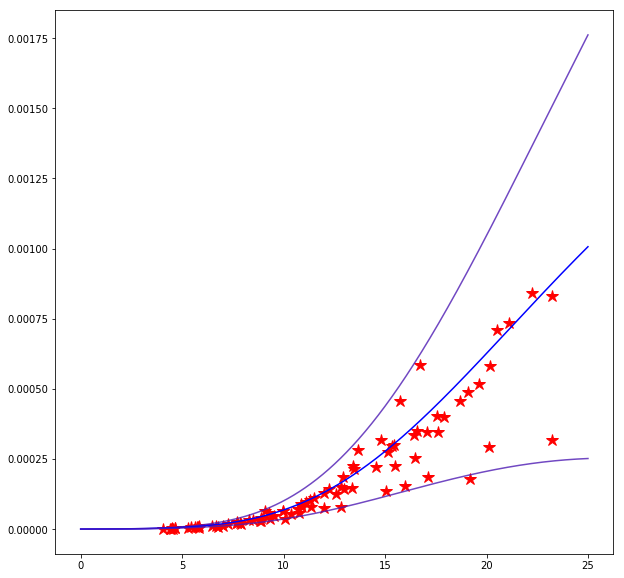

In [99]:
plt.figure(figsize=(10,10))
for num in range(1,7):
    timei = time[subj == num]
    yobsi = yobs[subj == num]
    plt.plot(timei , yobsi, "r*", markersize=12)

sampler = sampler_from_SDE(1,1.08141233e-01, 1.95082297e-03,0.5e-01)    #1.20859039e-01, 1.64551263e-03, 1.97640849e-01)
sampler.plot_ci()

No handles with labels found to put in legend.


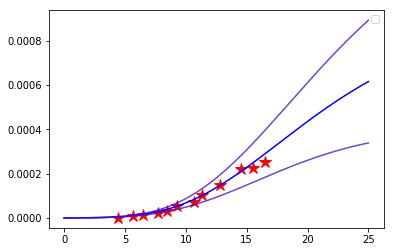

In [96]:
num=6
#for num in range(1,7):
timei = time[subj == num]
yobsi = yobs[subj == num]
plt.plot(timei , yobsi, "r*", markersize=12)



#t_v_voluti, x_m_voluti = eulerStep_vec(par=[2.10637195e-01, 6.60442535e-04]) # risultati di Simona  0.27, 5e-4 
t_v_voluti2, x_m_voluti2 = eulerStep_vec(par=[1.231e-01 , 1.166e-03]) #2.56794398e-01, 3.89804051e-04
#9.894e-02 , 2.222e-03
sampler = sampler_from_SDE(1,1.255e-01 , 9.144e-04, 2.99999992e-02)
sampler.plot_ci()
# miei risultati  8.565e-02 , 5.973e-03     #8.220e-02 , 4.064e-03  #9.37250847e-02, 2.47581883e-03   
#2.03241629e-01, 9.38913914e-04 #2.21169055e-01, 7.28137895e-04

#plt.plot(timei[0]+t_v_voluti, x_m_voluti, "b-")
#plt.plot(t_v_voluti2, x_m_voluti2, "g-") #timei[0]+

plt.legend()



In [4]:
timei

array([ 4.4526,  5.6351,  6.4907,  7.6979,  8.4773,  9.2978, 10.692 ,
       11.3167, 12.8289, 14.5346, 15.5006, 16.4679])

soggetto 1  len 15
Initial Objective: 2.810208740170101e-08
Final Objective: 1.0947744664484126e-08
Solution
x1 = 0.06146271701165419
x2 = 0.009857023923450215
x3 = 7.246447093953599e-07


soggetto 2  len 13
Initial Objective: 1.3129421141631316e-07
Final Objective: 3.2025504268022123e-09
Solution
x1 = 0.13050850563337352
x2 = 0.0037410307953149842
x3 = 2.3322670350875604e-10


soggetto 3  len 16
Initial Objective: 3.8011474453155053e-07
Final Objective: 4.560436568254855e-09
Solution
x1 = 0.11134271223834105
x2 = 0.0005911655136717753
x3 = 1.8532063971624384e-07


soggetto 4  len 12
Initial Objective: 9.489647471113416e-09
Final Objective: 2.000069017152599e-09
Solution
x1 = 0.118954890562699
x2 = 0.0012565210224234917
x3 = 1.053362331095203e-07


soggetto 5  len 18
Initial Objective: 7.790961639640154e-08
Final Objective: 1.9610549864022868e-08
Solution
x1 = 0.08618802427181693
x2 = 0.0026959220106330542
x3 = 6.072948180819819e-07


soggetto 6  len 12
Initial Objective: 4.10663972353

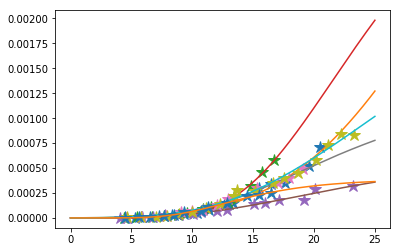

In [93]:
#import numpy as np
from scipy.optimize import minimize
alpha_list = [] ;kappa_list = []; Y_0_list = []

for num in range(1,7):

    timei = time[subj == num]
    yobsi = yobs[subj == num]
    print("soggetto %d  len %d"% (num , len(timei)))


    
    def x_fun_espl(t, alpha, kappa, Y_0):
        y = kappa * np.exp( np.log(Y_0/kappa) *  np.exp(- alpha* t))
        return y

    def objective(phii):
        global timei, yobsi
        alpha = phii[0]; kappa = phii[1] ; Y_0 = phii[2]
        x_hat_i= x_fun_espl(timei, alpha, kappa, Y_0)
        return np.sum(np.power((yobsi-x_hat_i), 2))




    # initial guesses
    n = 3
    x0 = np.zeros(n)
    x0[0] = 0.10
    x0[1] = 0.002
    x0[2] = 1e-7

    # show initial objective
    print('Initial Objective: ' + str(objective(x0)))

    # optimize
    solution = minimize(objective,x0, method='Nelder-Mead') 
    x = solution.x

    # show final objective
    print('Final Objective: ' + str(objective(x)))

    # print solution
    print('Solution')
    print('x1 = ' + str(x[0]))
    print('x2 = ' + str(x[1]))
    print('x3 = ' + str(x[2]))
    print("\n")
    alpha_list.append(x[0]); kappa_list.append(x[1]); Y_0_list.append(x[2])

    plt.plot(timei , yobsi, "*", markersize=12, label= "observed values")

    tempo = np.linspace(0.0, 25, 25000)
    x_hati = x_fun_espl(tempo, x[0], x[1], x[2])  
    plt.plot(tempo, x_hati)


In [92]:
((np.mean(alpha_list), np.sqrt(np.var(alpha_list))),(np.mean(kappa_list),np.sqrt(np.var(kappa_list))),\
  (np.mean(Y_0_list), np.sqrt(np.var(Y_0_list))))

((0.12213700951379597, 0.05102455034656692),
 (0.003088229394742958, 0.0032475607757620974),
 (2.7047518034865296e-07, 2.887950623370755e-07))